In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

In [2]:
import tensorflow_datasets as tfds

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
class_names = metadata.features['label'].names


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete9B2BUN/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete9B2BUN/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28 * 28))
test_images = test_images.astype('float32') / 255

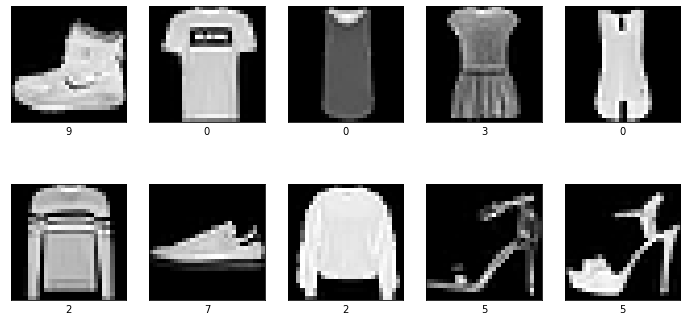

In [5]:
import matplotlib.pyplot as plt

# Plot the first 10 images from the training set
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(train_images[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=train_labels[i])


In [6]:
# Define the model architecture
def create_model(optimizer='rmsprop', activation='relu', hidden_units=512):
    model = keras.Sequential([
        layers.Dense(hidden_units, activation=activation, input_shape=(28 * 28,)),
        layers.Dense(hidden_units, activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 1024)              803840    
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Create KerasClassifier for RandomizedSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-7-12a90d351b0d>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [8]:
# Define hyperparameters
param_dist = {
    'optimizer': ['rmsprop', 'adam'],
    'activation': ['relu', 'tanh'],
    'hidden_units': [256, 512, 1024],
    'epochs': [1, 10, 20],
    'batch_size': [10, 256, 512]
}

In [9]:
# Define randomized search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=3, cv=3, n_jobs=-1)

In [10]:
# Fit the model
start_time = time.time()
random_search_result = random_search.fit(train_images, train_labels)
end_time = time.time()
training_time = end_time - start_time

In [11]:
# Print the best hyperparameters and score
print(f"Best Score: {random_search_result.best_score_:.4f}")
print(f"Best Params: {random_search_result.best_params_}")

Best Score: 0.8708
Best Params: {'optimizer': 'rmsprop', 'hidden_units': 1024, 'epochs': 20, 'batch_size': 10, 'activation': 'tanh'}


In [12]:
# Define the function to create the model
def create_model(optimizer, hidden_units, activation):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(784,)),
        keras.layers.Dense(hidden_units, activation=activation),
        keras.layers.Dense(10)
    ])
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

In [13]:
# Train the model with the best hyperparameters
import tensorflow as tf

best_params = {'optimizer': 'adam', 'hidden_units': 1024, 'activation': 'relu'}
model = create_model(**best_params)
history = model.fit(train_images, train_labels, epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
94/94 [==============================] - 2s 8ms/step - loss: 0.6000 - accuracy: 0.7967 - val_loss: 0.4692 - val_accuracy: 0.8360
Epoch 2/10
94/94 [==============================] - 1s 5ms/step - loss: 0.4140 - accuracy: 0.8571 - val_loss: 0.3956 - val_accuracy: 0.8603
Epoch 3/10
94/94 [==============================] - 1s 6ms/step - loss: 0.3690 - accuracy: 0.8706 - val_loss: 0.3739 - val_accuracy: 0.8676
Epoch 4/10
94/94 [==============================] - 0s 5ms/step - loss: 0.3377 - accuracy: 0.8788 - val_loss: 0.3531 - val_accuracy: 0.8773
Epoch 5/10
94/94 [==============================] - 1s 5ms/step - loss: 0.3210 - accuracy: 0.8840 - val_loss: 0.3425 - val_accuracy: 0.8760
Epoch 6/10
94/94 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8912 - val_loss: 0.3313 - val_accuracy: 0.8815
Epoch 7/10
94/94 [==============================] - 1s 6ms/step - loss: 0.2876 - accuracy: 0.8938 - val_loss: 0.3222 - val_accuracy: 0.8822
Epoch 8/10
94/94 [==

In [14]:
# Predict on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', test_acc)

test_images = test_images.reshape((test_images.shape[0], 784,))

predictions = model.predict(test_images) 

Test accuracy: 0.8794999718666077
313/313 [==============================] - 1s 2ms/step


In [25]:
predictions[3]

array([ -1.0606086,  10.548888 ,  -5.5047374,   0.3083755,  -3.0111427,
        -9.120463 ,  -3.2712727, -10.041841 ,  -7.1316676, -10.100515 ],
      dtype=float32)

In [15]:
# Convert probabilities to class labels
y_pred_labels = np.argmax(predictions, axis=1)

In [22]:
y_pred_labels


array([9, 2, 1, ..., 8, 1, 5])

In [18]:
# Print classification report
from sklearn.metrics import classification_report 
print(classification_report(test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.68      0.77      1000
           3       0.87      0.89      0.88      1000
           4       0.76      0.83      0.79      1000
           5       0.97      0.97      0.97      1000
           6       0.65      0.74      0.69      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



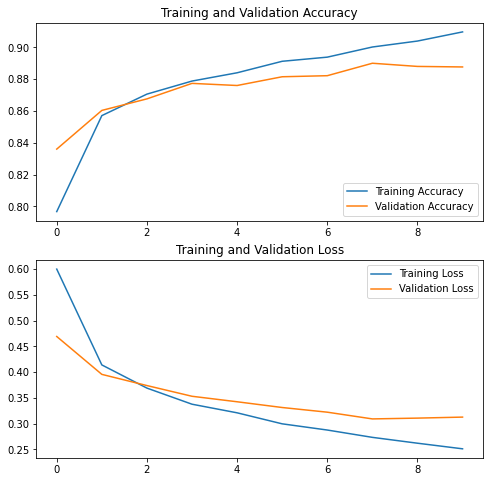

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc)) # use the length of acc (or any other history list) as epochs_range
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix


# Create the confusion matrix
cm = confusion_matrix(test_labels, y_pred_labels)

# Print the confusion matrix
print(cm)

[[834   0   4  25   4   0 124   0   9   0]
 [  2 971   0  20   3   0   3   0   1   0]
 [ 15   0 681  14 155   0 133   0   2   0]
 [ 19  10   5 894  26   0  42   0   4   0]
 [  0   1  42  38 831   0  86   0   2   0]
 [  0   0   0   1   0 969   0  21   1   8]
 [114   1  42  27  68   0 738   0  10   0]
 [  0   0   0   0   0  22   0 949   1  28]
 [  5   0   4   4   4   2   8   3 970   0]
 [  0   0   0   0   0  10   1  31   0 958]]


In [32]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
predictions

array([[ -6.93411   , -11.56928   ,  -6.93709   , ...,   1.6704594 ,
         -3.2229004 ,   6.066562  ],
       [  1.5967882 ,  -7.754694  ,  10.931644  , ..., -17.45125   ,
         -4.3353186 , -19.946228  ],
       [  0.6892006 ,  12.975482  ,  -6.0641885 , ..., -11.342689  ,
         -4.2004433 , -15.268758  ],
       ...,
       [ -0.7436759 , -10.411115  ,  -2.706588  , ...,  -5.5423884 ,
          6.5849614 , -11.673187  ],
       [ -4.0160975 ,   9.8294735 ,  -7.0295234 , ...,  -8.451997  ,
         -5.4500227 ,  -8.519609  ],
       [ -4.451064  ,  -7.391362  ,  -3.326673  , ...,   0.65613043,
         -1.2915359 ,  -3.487308  ]], dtype=float32)

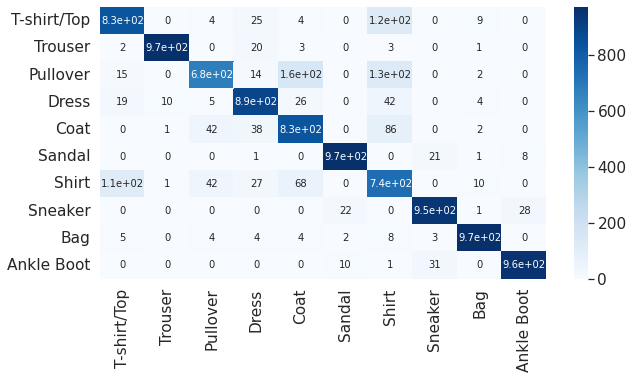

In [39]:
import seaborn as sn

confusion_mtx = confusion_matrix(test_labels, y_pred_labels)

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

conf = pd.DataFrame(confusion_mtx, columns = classes, index = classes)
plt.figure(figsize = (10,5))
sn.set(font_scale=1.4)
sn.heatmap(conf, cmap="Blues", annot=True,annot_kws={"size": 10})# font size 